In [1]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("Data Analyst - Test Data_date_clean.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      6393 non-null   object 
 1   date        6448 non-null   object 
 2   Location    1711 non-null   object 
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 201.6+ KB


In [8]:
df.head(5)

,Review,date,Location,Unnamed: 3
0,I was very pleased with Resort. It’s a beautif...,01-08-2018,NaN,NaN
1,The hidden fees added up to $70 per a night. J...,01-08-2018,NaN,NaN
2,I was there for the FSOMA conference and had a...,01-08-2018,NaN,NaN
3,Wyndham Grand Orlando Resort Bonnet Creek is a...,01-08-2018,NaN,NaN
4,At the Wyndham grand bonnet creek. It was ever...,01-08-2018,NaN,NaN


In [21]:
df["Review"] = df["Review"].fillna("N/A")

In [22]:
def remove_n(text):
    return text.replace("\n", " ")

df['New_review'] = df['Review'].apply(remove_n)

In [26]:
df = df.drop(["Unnamed: 3","Review"],axis=1)

In [27]:
df

,date,Location,New_review
0,01-08-2018,NaN,I was very pleased with Resort. It’s a beautif...
1,01-08-2018,NaN,The hidden fees added up to $70 per a night. J...
2,01-08-2018,NaN,I was there for the FSOMA conference and had a...
3,01-08-2018,NaN,Wyndham Grand Orlando Resort Bonnet Creek is a...
4,01-08-2018,NaN,At the Wyndham grand bonnet creek. It was ever...
...,...,...,...
6443,19-08-2019,Slovenia,·convenient location and excellent hotel for t...
6444,20-08-2019,Sebastian,I was very impressed with the resort. Great s...
6445,20-08-2019,Los Angeles,The rooms were nice the outside needs work als...
6446,20-08-2019,Georgia,Great location! I have stayed at this hotel on...


In [29]:
import langid

def language_identifier(text):
    return langid.classify(text)

df['predicted_language'] = df['New_review'].apply(language_identifier)

In [30]:
df

,date,Location,New_review,predicted_language
0,01-08-2018,NaN,I was very pleased with Resort. It’s a beautif...,"(en, -654.9185266494751)"
1,01-08-2018,NaN,The hidden fees added up to $70 per a night. J...,"(en, -675.9392147064209)"
2,01-08-2018,NaN,I was there for the FSOMA conference and had a...,"(en, -501.0144829750061)"
3,01-08-2018,NaN,Wyndham Grand Orlando Resort Bonnet Creek is a...,"(en, -671.3645722866058)"
4,01-08-2018,NaN,At the Wyndham grand bonnet creek. It was ever...,"(en, -639.5424690246582)"
...,...,...,...,...
6443,19-08-2019,Slovenia,·convenient location and excellent hotel for t...,"(en, -626.7576837539673)"
6444,20-08-2019,Sebastian,I was very impressed with the resort. Great s...,"(en, -326.1396164894104)"
6445,20-08-2019,Los Angeles,The rooms were nice the outside needs work als...,"(en, -345.5480499267578)"
6446,20-08-2019,Georgia,Great location! I have stayed at this hotel on...,"(en, -159.12107133865356)"


In [31]:
df["predicted_language"] = df["predicted_language"].apply(lambda x:x[0])

In [32]:
df

,date,Location,New_review,predicted_language
0,01-08-2018,NaN,I was very pleased with Resort. It’s a beautif...,en
1,01-08-2018,NaN,The hidden fees added up to $70 per a night. J...,en
2,01-08-2018,NaN,I was there for the FSOMA conference and had a...,en
3,01-08-2018,NaN,Wyndham Grand Orlando Resort Bonnet Creek is a...,en
4,01-08-2018,NaN,At the Wyndham grand bonnet creek. It was ever...,en
...,...,...,...,...
6443,19-08-2019,Slovenia,·convenient location and excellent hotel for t...,en
6444,20-08-2019,Sebastian,I was very impressed with the resort. Great s...,en
6445,20-08-2019,Los Angeles,The rooms were nice the outside needs work als...,en
6446,20-08-2019,Georgia,Great location! I have stayed at this hotel on...,en


In [34]:
from textblob import TextBlob


def perform_sentiment_analysis(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

df['sentiment'] = df['New_review'].apply(perform_sentiment_analysis)

In [44]:
df['Date']= pd.to_datetime(df['date'],format='mixed')

In [48]:
df = df.drop('date',axis=1)

In [50]:
df = df[['Date','Location', 'New_review', 'predicted_language', 'sentiment']]

In [51]:
df

,Date,Location,New_review,predicted_language,sentiment
0,2018-01-08,NaN,I was very pleased with Resort. It’s a beautif...,en,positive
1,2018-01-08,NaN,The hidden fees added up to $70 per a night. J...,en,negative
2,2018-01-08,NaN,I was there for the FSOMA conference and had a...,en,positive
3,2018-01-08,NaN,Wyndham Grand Orlando Resort Bonnet Creek is a...,en,positive
4,2018-01-08,NaN,At the Wyndham grand bonnet creek. It was ever...,en,positive
...,...,...,...,...,...
6443,2019-08-19,Slovenia,·convenient location and excellent hotel for t...,en,negative
6444,2019-08-20,Sebastian,I was very impressed with the resort. Great s...,en,positive
6445,2019-08-20,Los Angeles,The rooms were nice the outside needs work als...,en,positive
6446,2019-08-20,Georgia,Great location! I have stayed at this hotel on...,en,positive


In [52]:
df['year'] = df['Date'].dt.year

In [53]:
df['month'] = df['Date'].dt.month

In [54]:
df

,Date,Location,New_review,predicted_language,sentiment,year,month
0,2018-01-08,NaN,I was very pleased with Resort. It’s a beautif...,en,positive,2018,1
1,2018-01-08,NaN,The hidden fees added up to $70 per a night. J...,en,negative,2018,1
2,2018-01-08,NaN,I was there for the FSOMA conference and had a...,en,positive,2018,1
3,2018-01-08,NaN,Wyndham Grand Orlando Resort Bonnet Creek is a...,en,positive,2018,1
4,2018-01-08,NaN,At the Wyndham grand bonnet creek. It was ever...,en,positive,2018,1
...,...,...,...,...,...,...,...
6443,2019-08-19,Slovenia,·convenient location and excellent hotel for t...,en,negative,2019,8
6444,2019-08-20,Sebastian,I was very impressed with the resort. Great s...,en,positive,2019,8
6445,2019-08-20,Los Angeles,The rooms were nice the outside needs work als...,en,positive,2019,8
6446,2019-08-20,Georgia,Great location! I have stayed at this hotel on...,en,positive,2019,8


In [58]:
print(f'Date ranges from {df["Date"].min()} to {df["Date"].max()}')

Date ranges from 2018-01-08 00:00:00 to 2019-12-08 00:00:00


In [60]:
df["year"].value_counts()

year
2019    3856
2018    2592
Name: count, dtype: int64

In [61]:
df["month"].value_counts()

month
1     1332
12     568
4      555
8      524
3      505
11     490
10     470
7      467
5      433
9      398
2      389
6      317
Name: count, dtype: int64

In [64]:
df.groupby("year")["month"].count()

year
2018    2592
2019    3856
Name: month, dtype: int64

In [89]:
df_year_month = df.groupby(["year","month"]).agg({"New_review":"count"}).reset_index()

In [93]:
df_year_month.sort_values("New_review",ascending=False)

,year,month,New_review
12,2019,1,952
15,2019,4,468
11,2018,12,457
14,2019,3,441
18,2019,7,412
10,2018,11,387
0,2018,1,380
16,2019,5,375
9,2018,10,369
7,2018,8,315


In [95]:
df_2019 = df[df["year"] == 2019]

In [106]:
sentiment_2019 = df_2019.groupby(["month","sentiment"]).agg({"Date":"count"}).reset_index()

In [107]:
df_2018 = df[df["year"] == 2018]

In [108]:
sentiment_2018 = df_2018.groupby(["month","sentiment"]).agg({"Date":"count"}).reset_index()

In [113]:
import seaborn as sns 

<Axes: xlabel='sentiment', ylabel='count'>

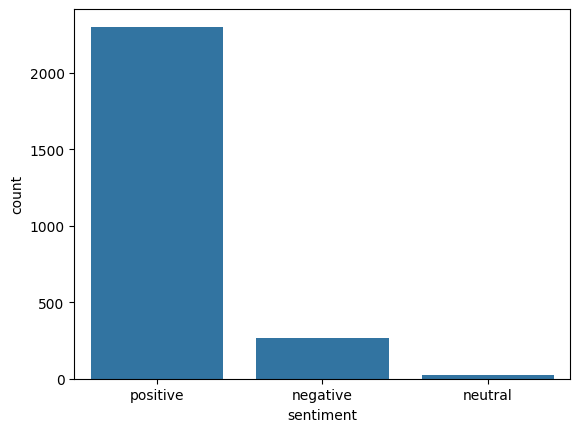

In [118]:
sns.countplot(data=df_2018,x="sentiment")

<Axes: xlabel='month', ylabel='count'>

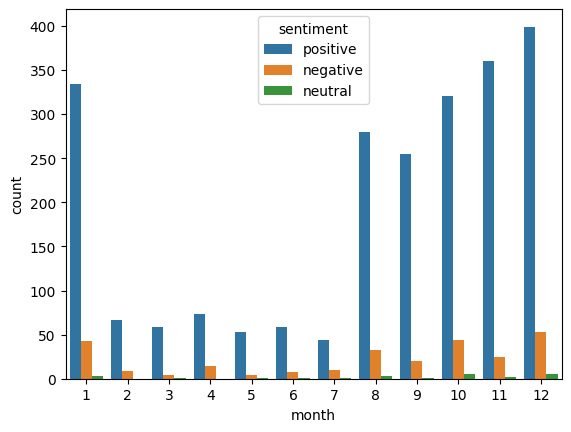

In [122]:
sns.countplot(data=df_2018,x="month",hue="sentiment")

<Axes: xlabel='sentiment', ylabel='count'>

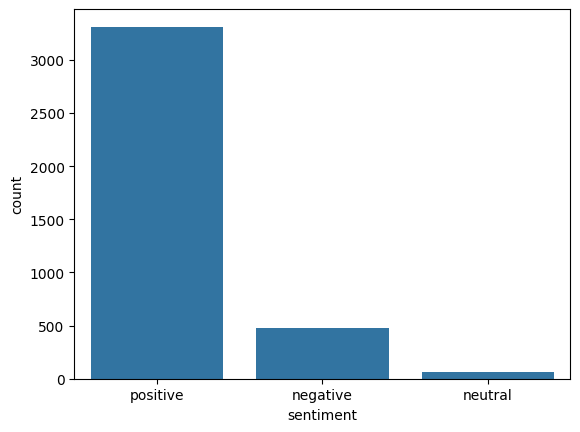

In [119]:
sns.countplot(data=df_2019,x="sentiment")

<Axes: xlabel='month', ylabel='count'>

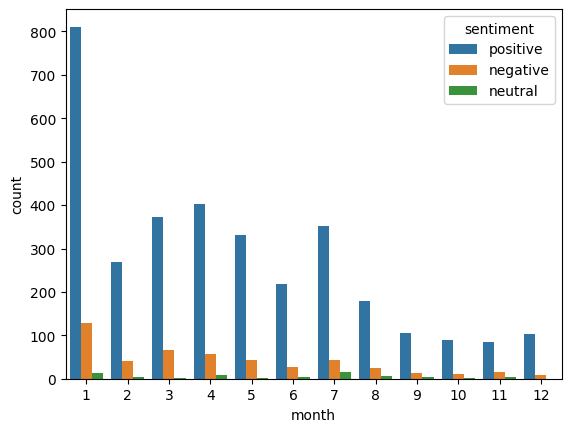

In [123]:
sns.countplot(data=df_2019,x="month",hue="sentiment")

In [137]:
df["Location"].value_counts().reset_index().head(10)

,Location,count
0,United States of America,116
1,New York,34
2,California,19
3,San Jose,19
4,Florida,16
5,Canada,16
6,United Kingdom,14
7,"New York, NY",13
8,NY,12
9,Miami,12


In [131]:
top_location.unique()

array([116,  34,  19,  16,  14,  13,  12], dtype=int64)

In [ ]:
df_location = df["Location"]